In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.set_index('policy_number',inplace=True)

In [6]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
342868,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
687698,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
227811,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
367455,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
data.shape

(1000, 39)

we have 1000row's of data, 38 features and 1 label

In [8]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

data set is not balanced

# DATA PRE PROCESSING

In [9]:
le = LabelEncoder()

In [10]:
data['fraud_reported'] = le.fit_transform(data['fraud_reported'])

In [11]:
data.isna().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [12]:
data.drop('_c39',axis=1,inplace=True)

In [13]:
data.shape

(1000, 38)

we have no missing values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_rel

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In [16]:
data.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [17]:
cat_data = data.select_dtypes('object').columns.tolist()

In [18]:
cont_data = data.select_dtypes(['int64','float64']).columns.tolist()

In [19]:
cat_data

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

In [20]:
cont_data

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [21]:
len(cat_data)

20

In [22]:
len(cont_data)

17

In [23]:
for i in data[cat_data]:
    print(f'{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n')

951
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

3
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

3
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

2
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

7
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

14
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [24]:
data.drop(['auto_model','incident_location','incident_city','incident_date','policy_bind_date'],axis=1,inplace=True)

dropping columns with 0% variance or 100% variance

In [25]:
data.drop(['insured_sex','insured_hobbies','insured_relationship','auto_make'],axis=1,inplace=True)

removing some more features who have no relationship with label

In [26]:
cat_data.remove('auto_model')

In [27]:
cat_data.remove('incident_location')

In [28]:
cat_data.remove('incident_city')

In [29]:
cat_data.remove('incident_date')

In [30]:
cat_data.remove('policy_bind_date')

In [31]:
cat_data.remove('insured_sex')

In [32]:
cat_data.remove('insured_hobbies')

In [33]:
cat_data.remove('insured_relationship')

In [34]:
cat_data.remove('auto_make')

In [35]:
data.shape

(1000, 29)

In [36]:
len(cat_data)

11

# EDA

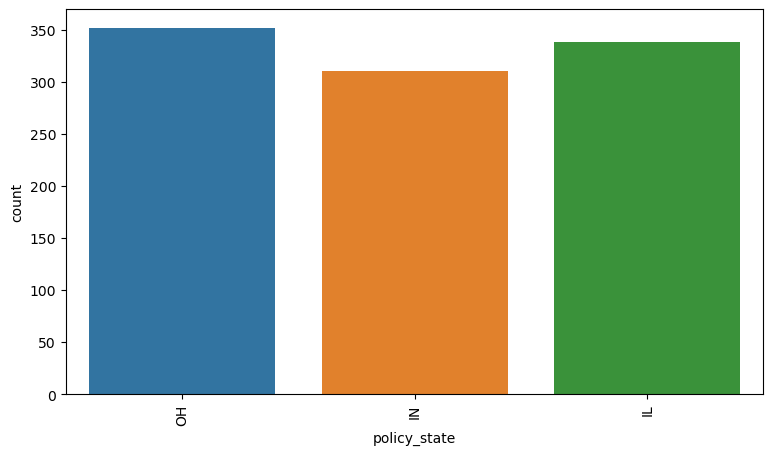

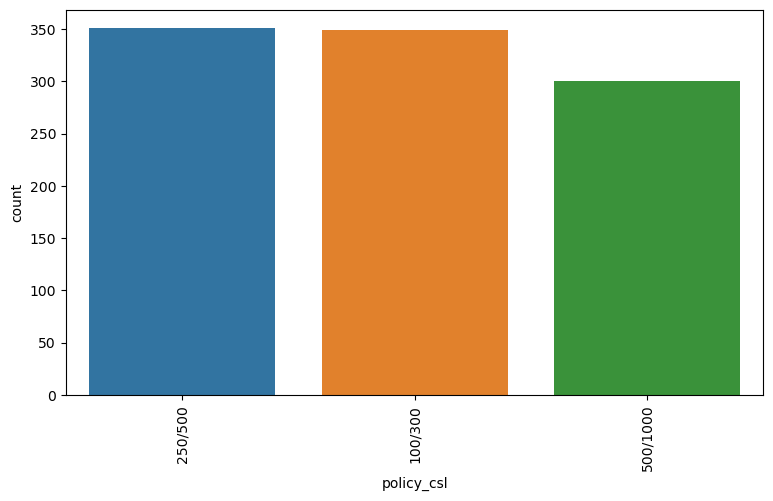

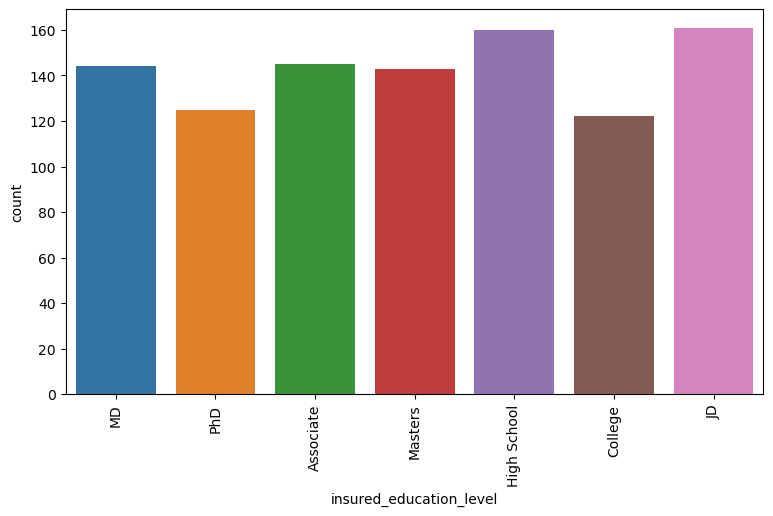

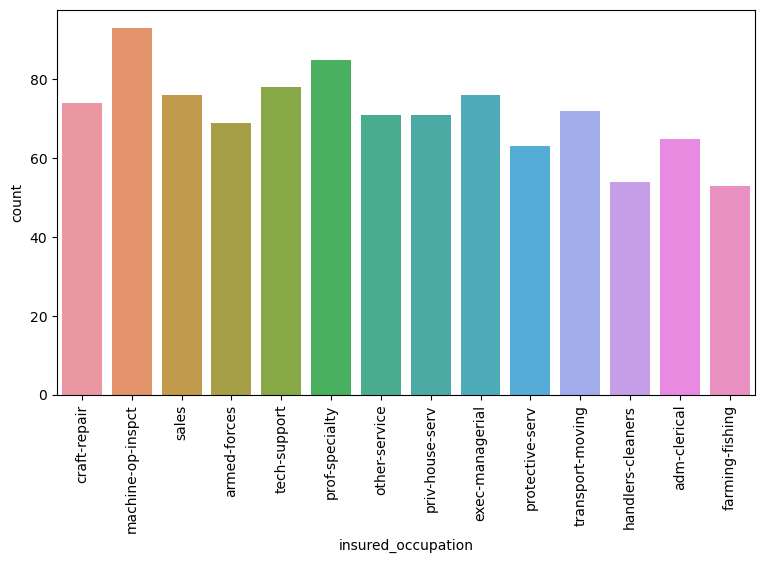

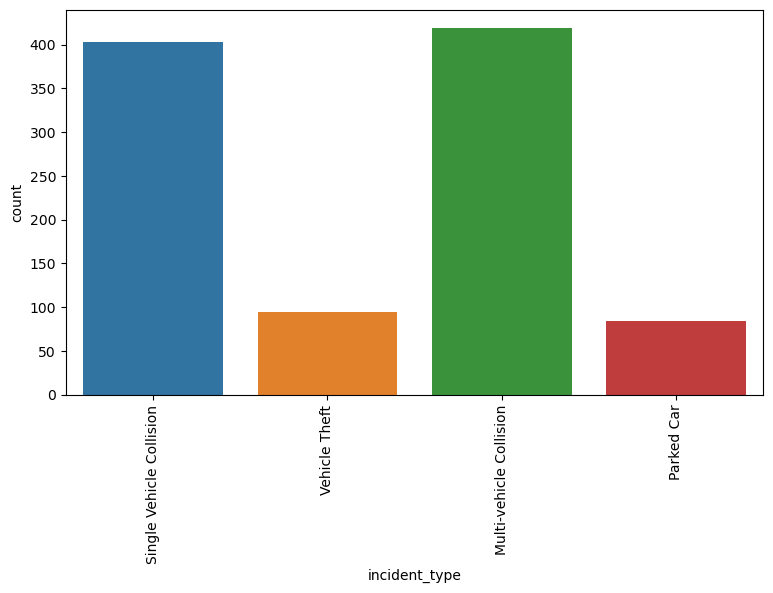

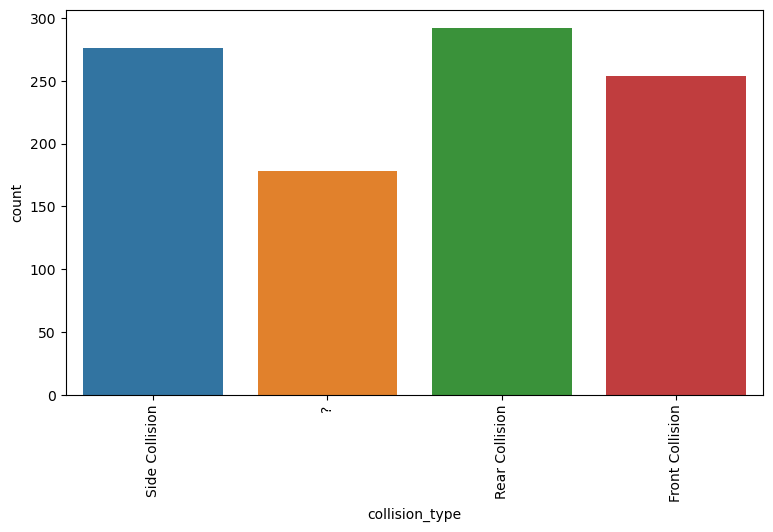

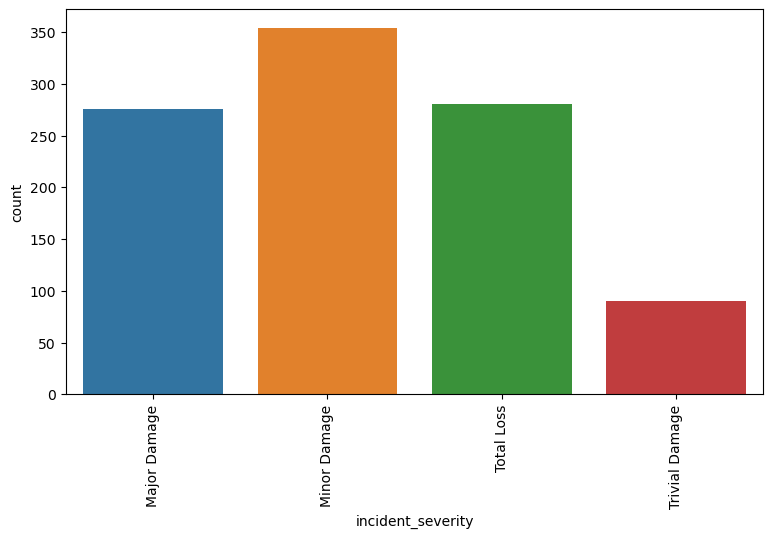

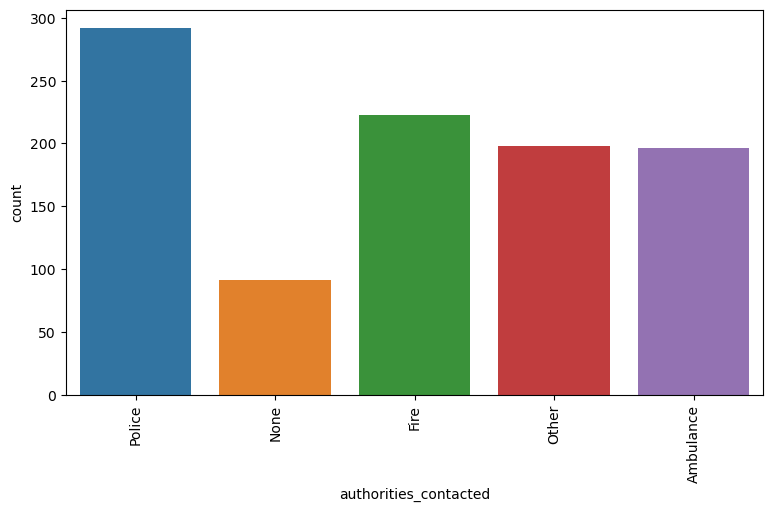

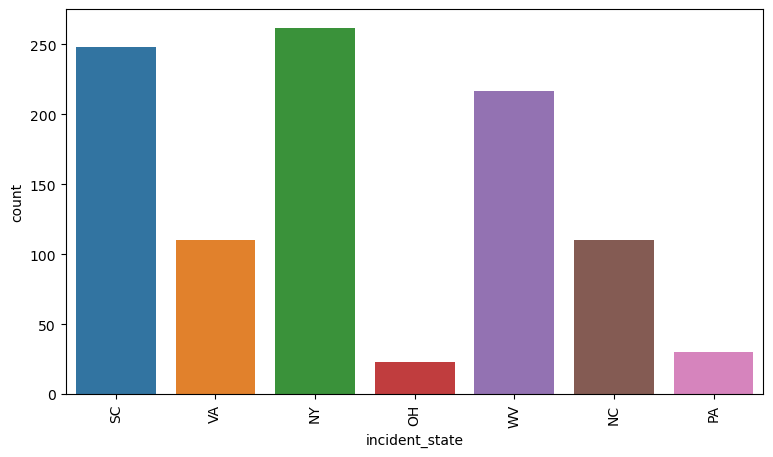

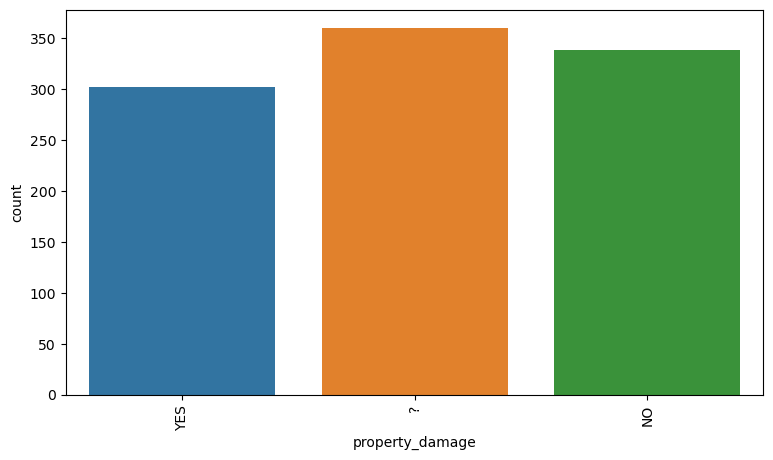

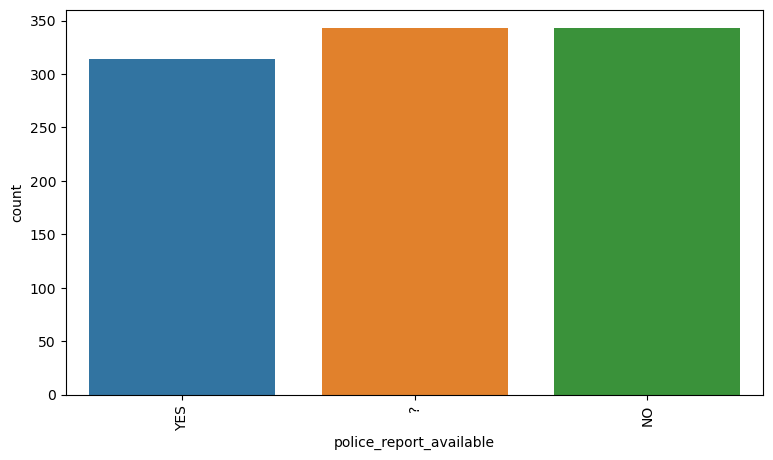

In [37]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

1. most of the policies are from OH state

2. most of the insured are females

3. most of the insured are high school graduates

4. most of the insured are machine operation inspector

5. most of the insured ahve reading as their hobbies

6. most of the insured own a child

7. most of the incidents are multi vehicle colision

8. most of the collision are rear vehcile colision

9. most incidents were minor incidents

10. in most of the cases police was contatced

11. most incidents happened in NY state

12. propert damage and police report are unavailable for most of the incidents

13. most incidents happened in Saab,Dodge and Suburu maked cars

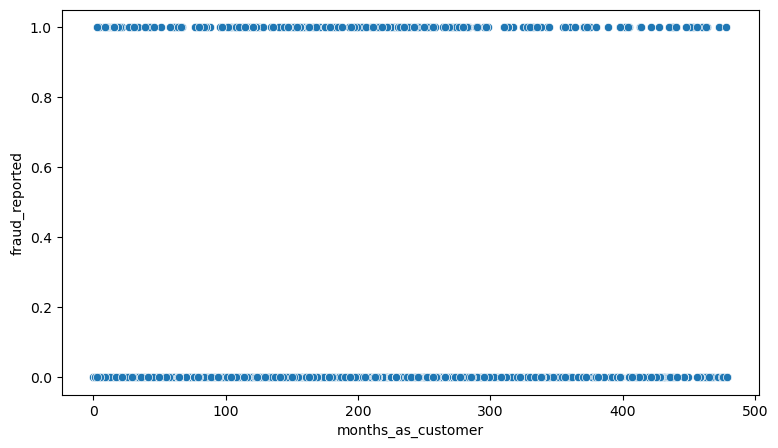

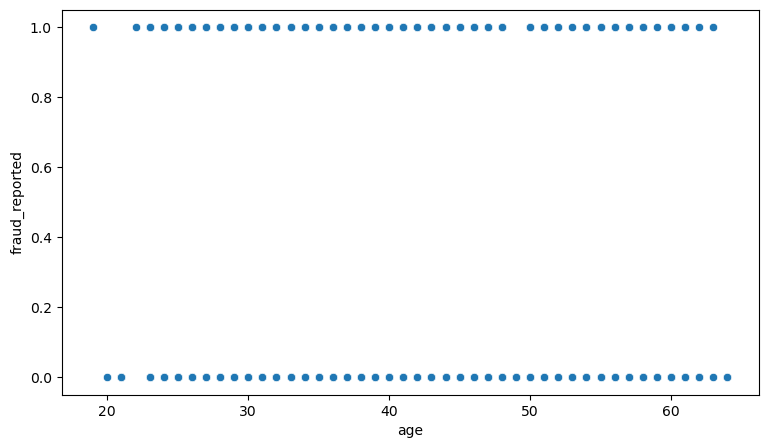

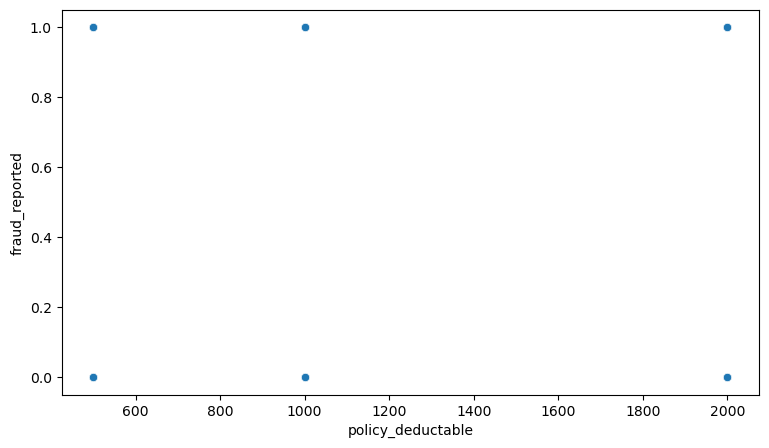

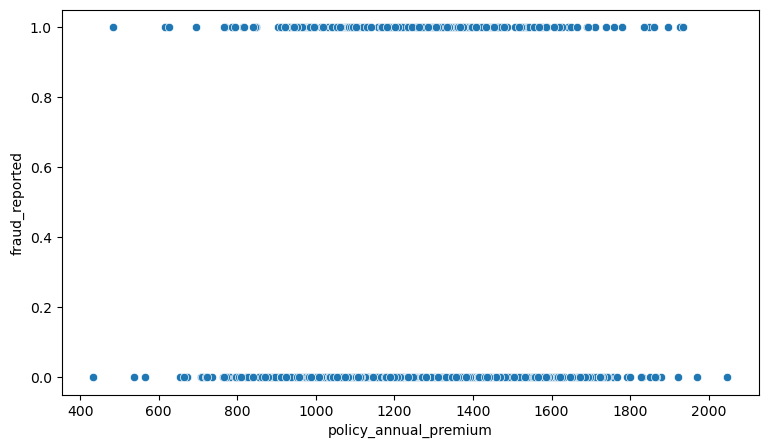

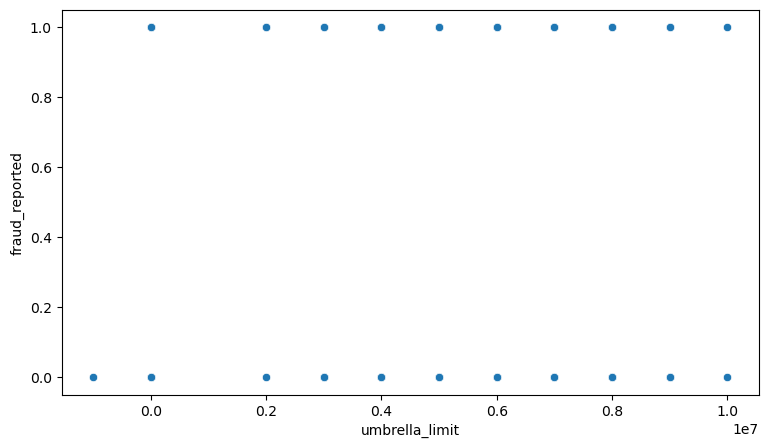

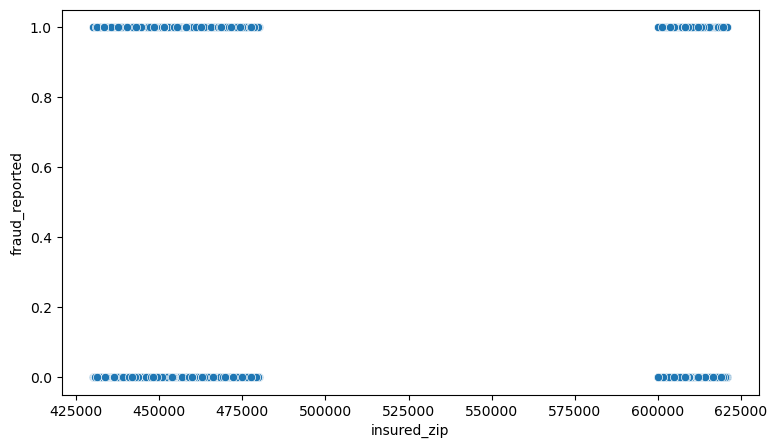

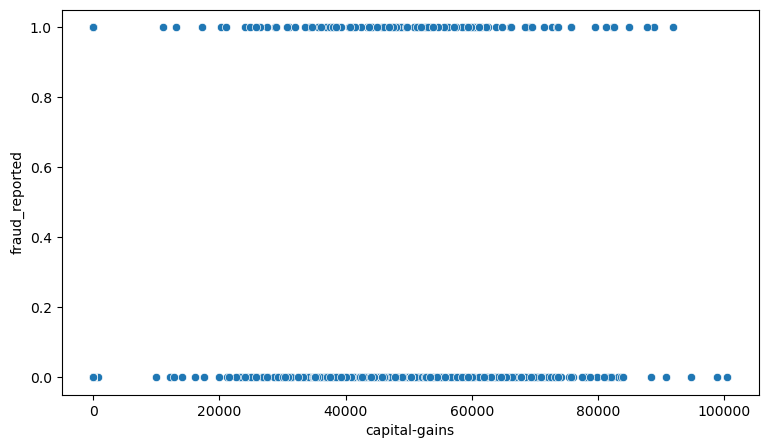

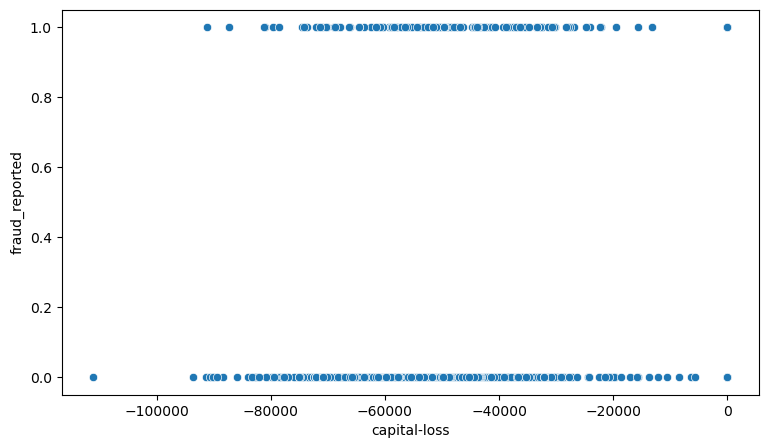

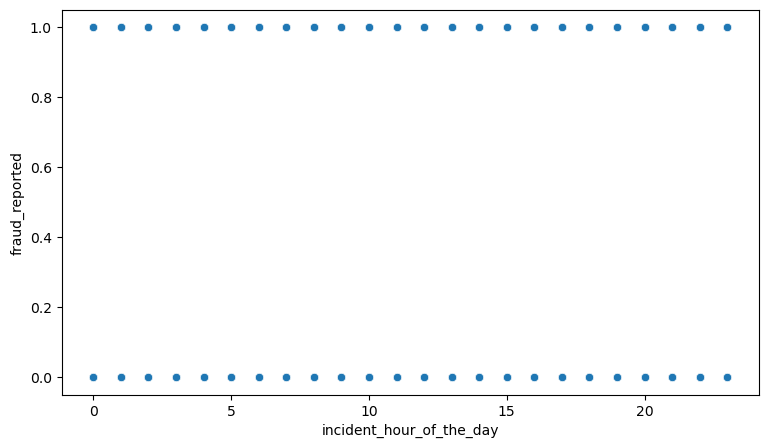

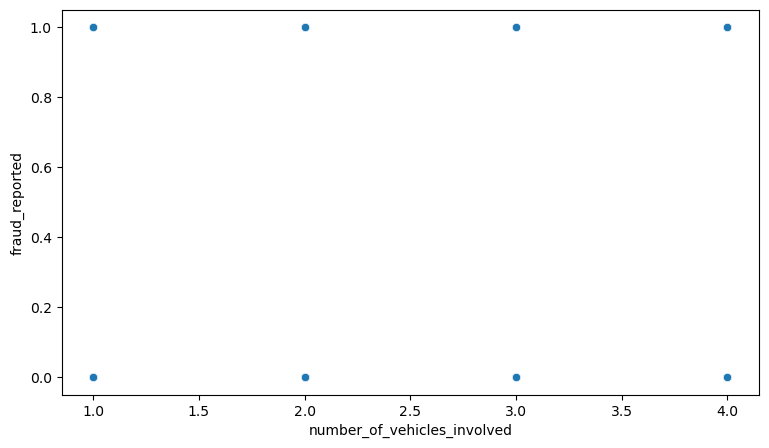

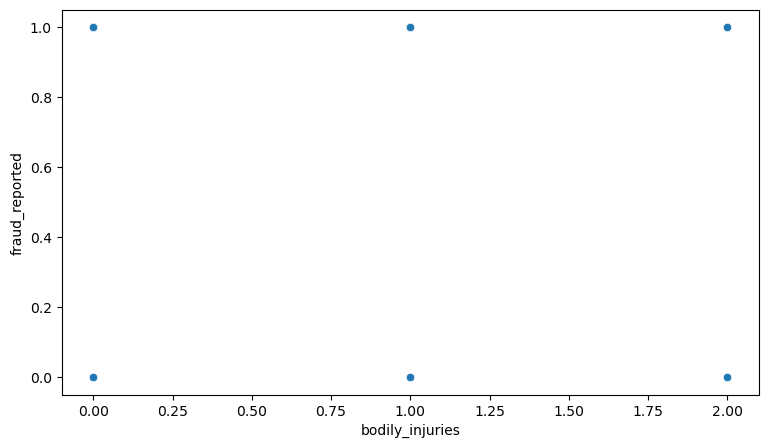

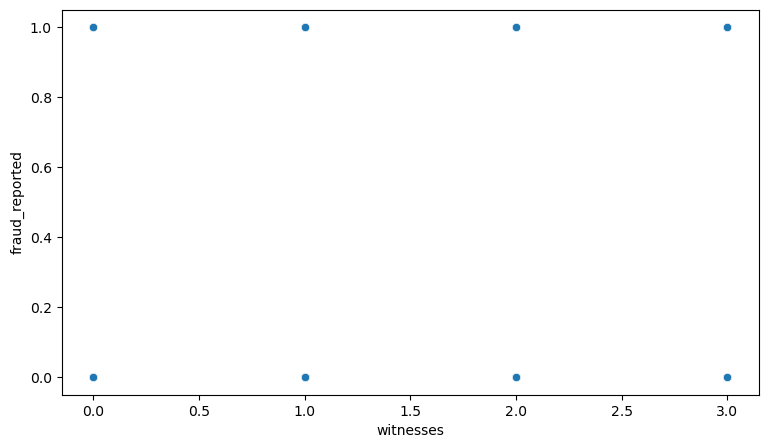

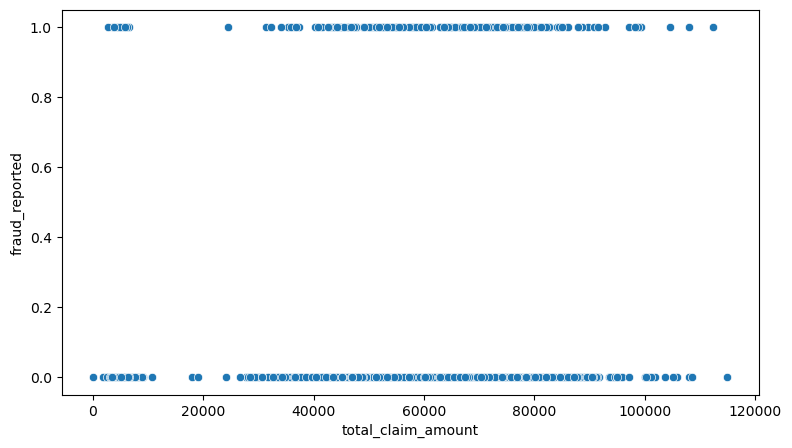

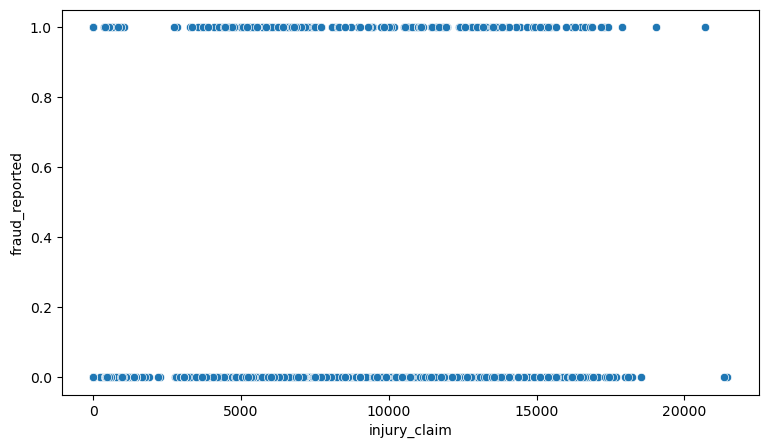

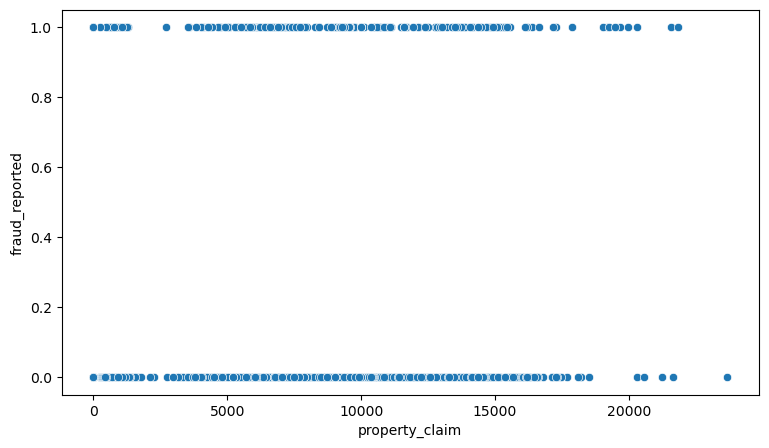

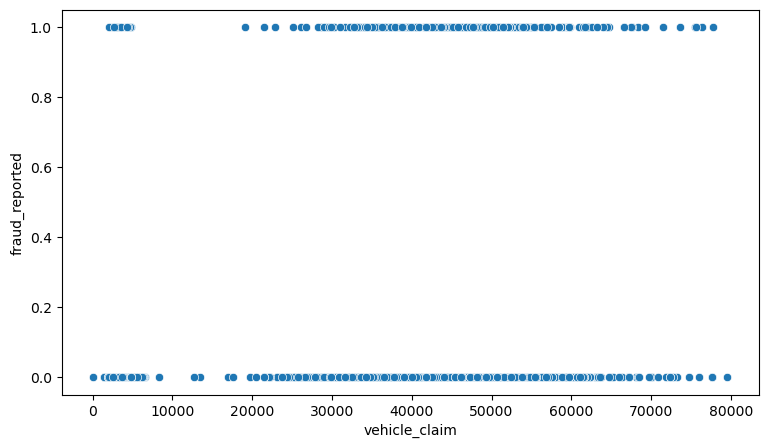

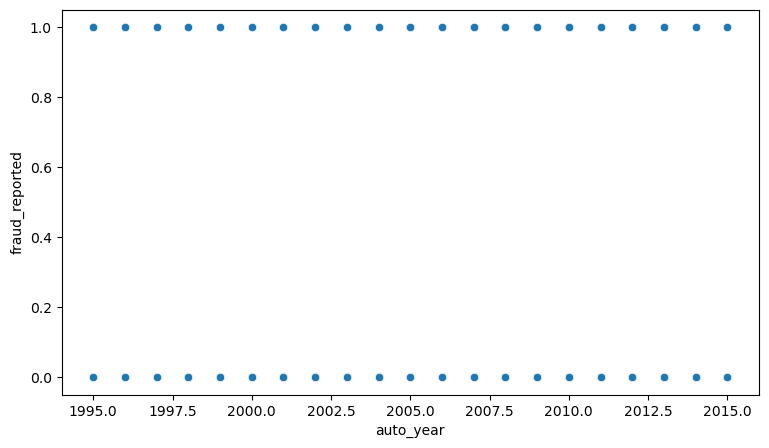

In [38]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['fraud_reported'])
    plt.xlabel(i)
    plt.show()

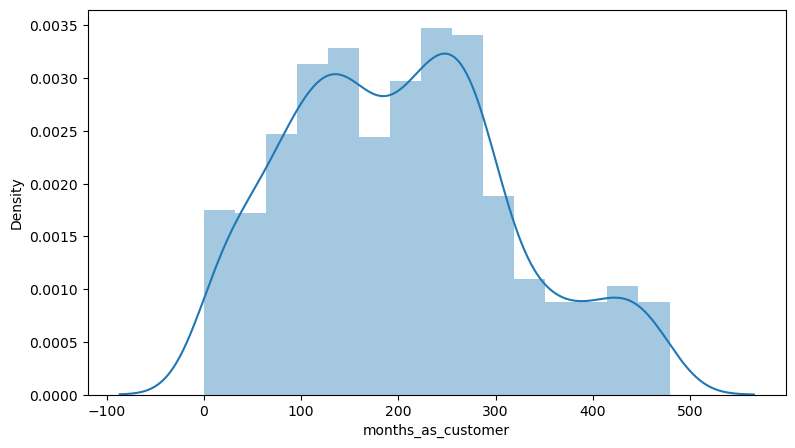

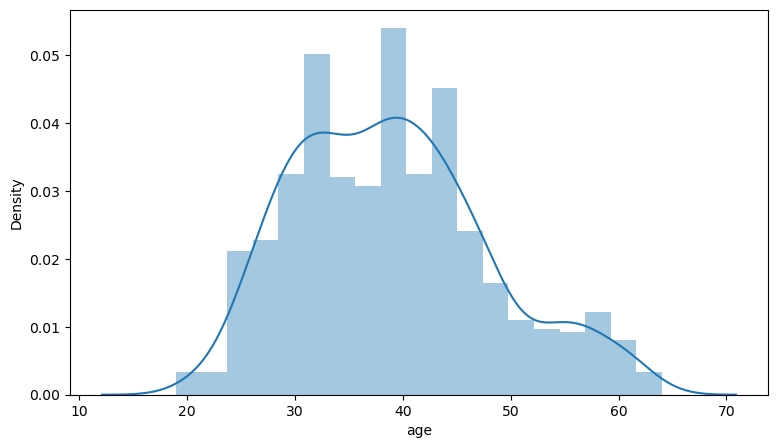

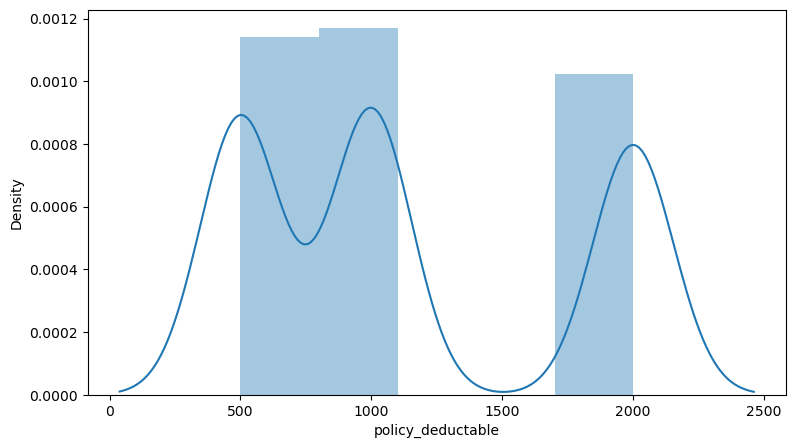

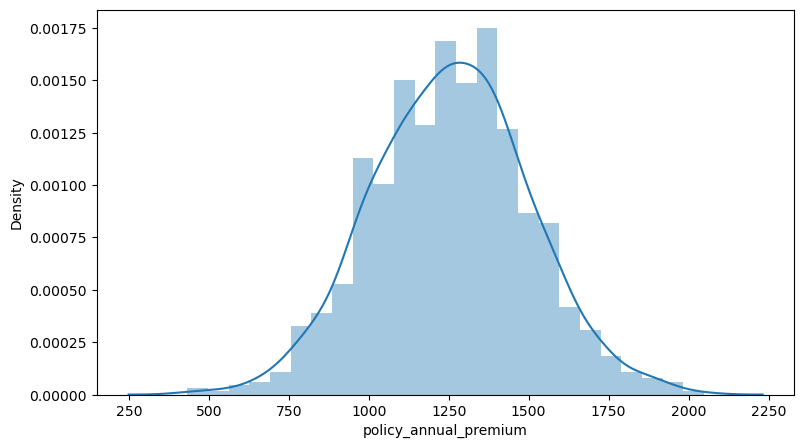

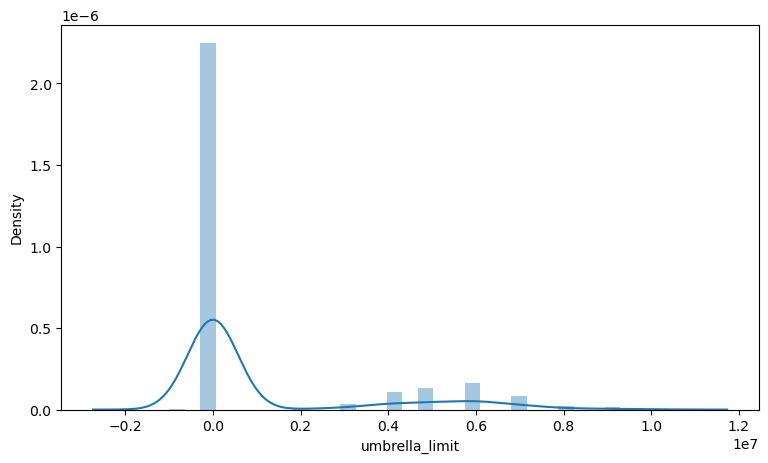

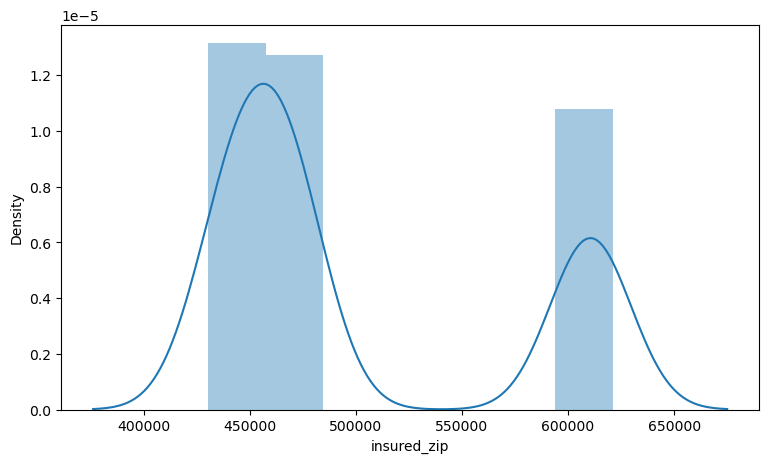

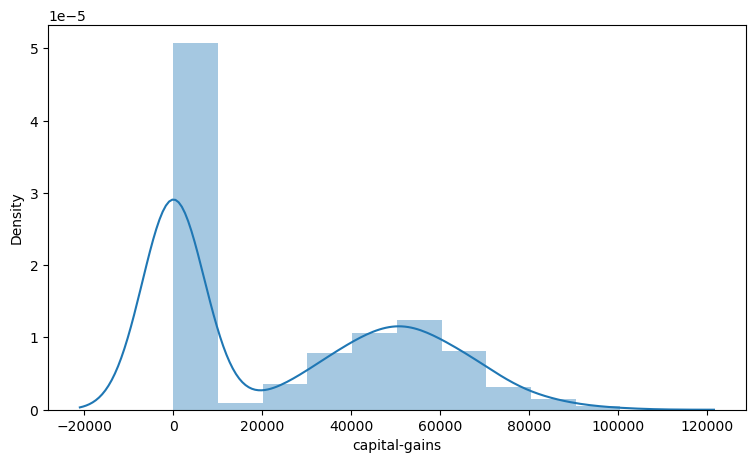

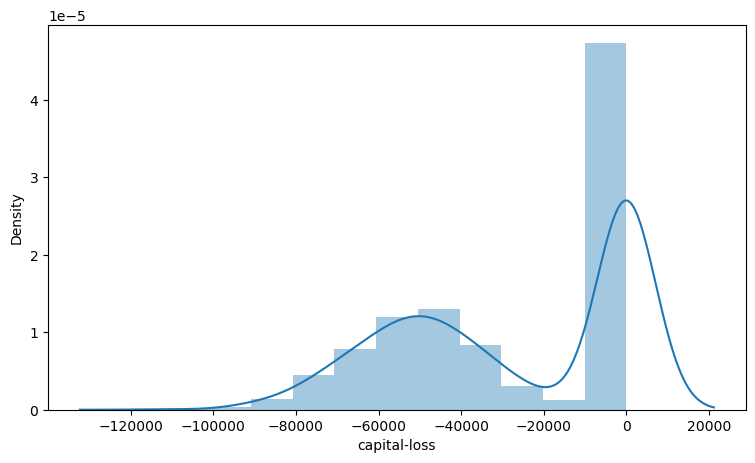

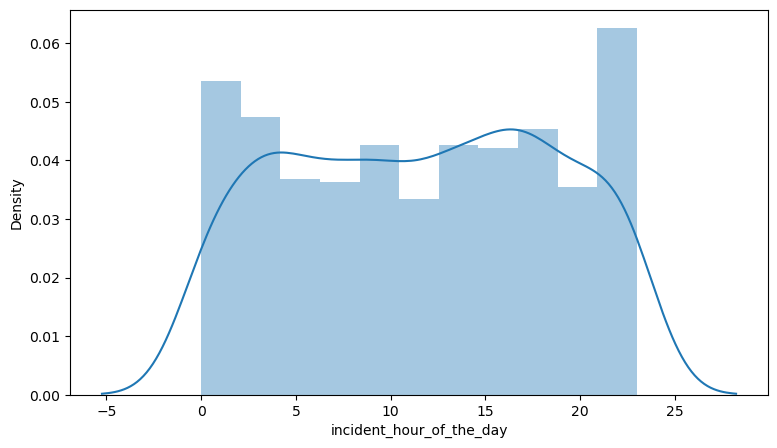

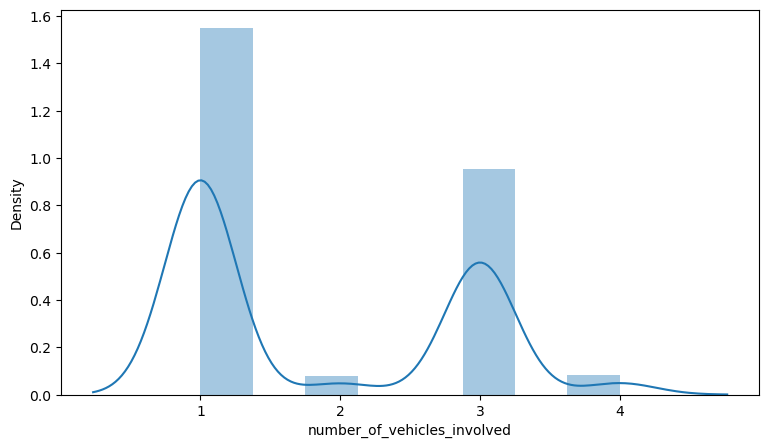

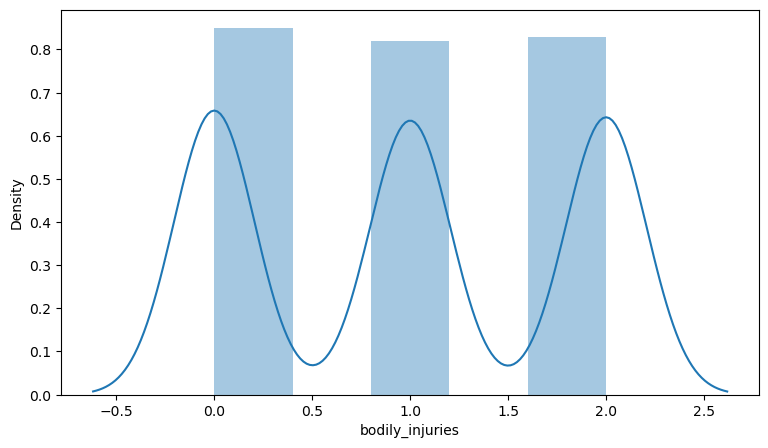

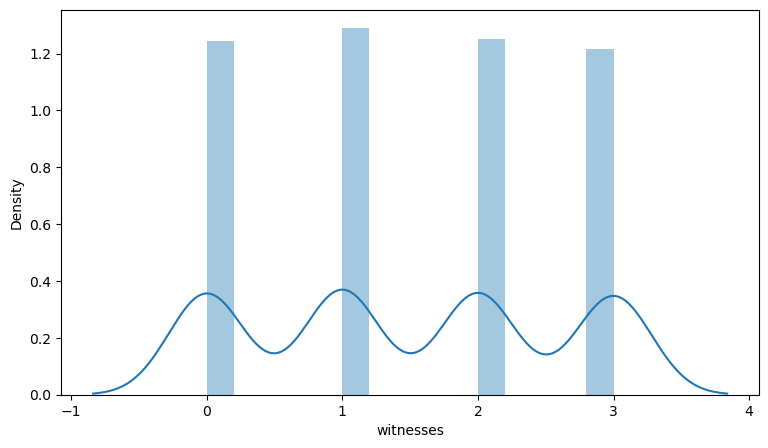

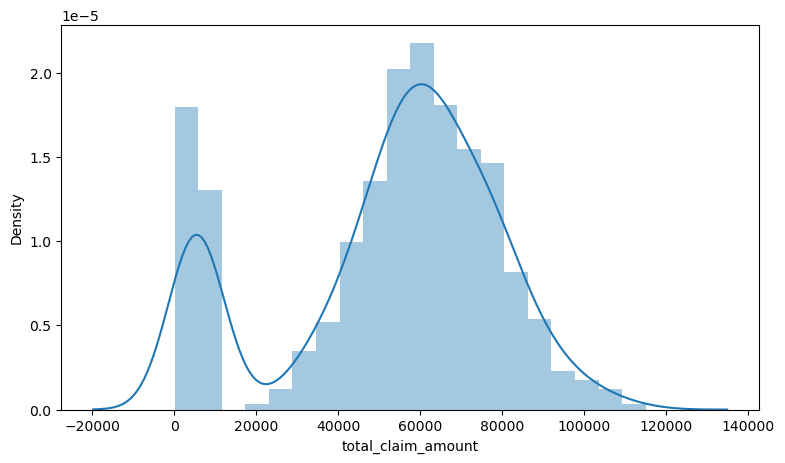

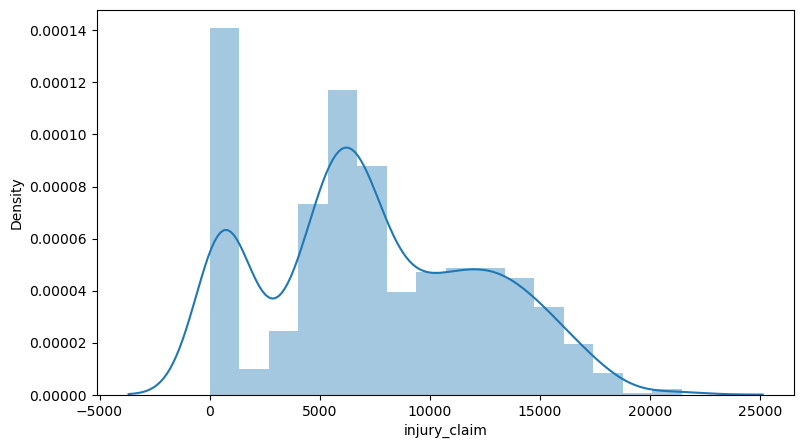

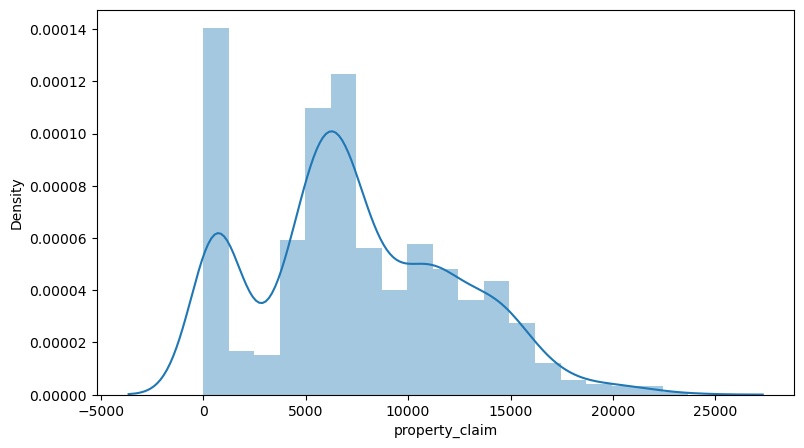

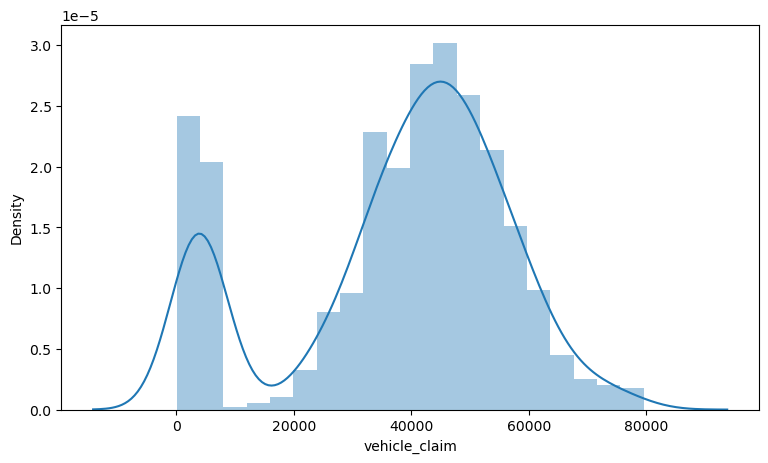

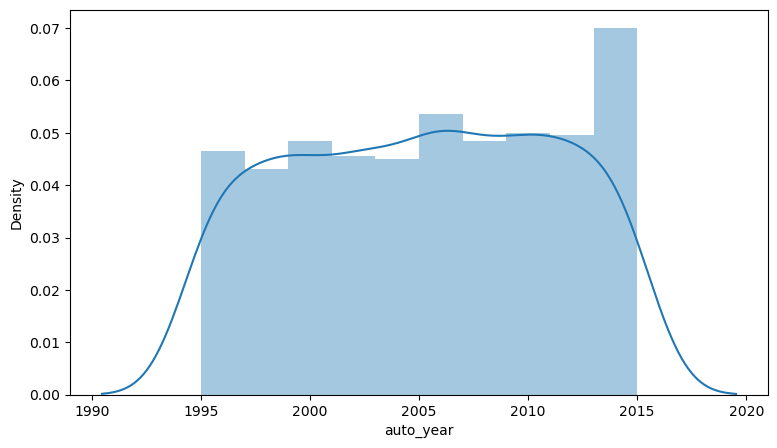

In [39]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

policy deductable,umbrella_limit,insured_zip,no fo vehciles involved,bodily_injuries,witness are discrete data and rest all are continous data, and none of the continous data is normally distributed.

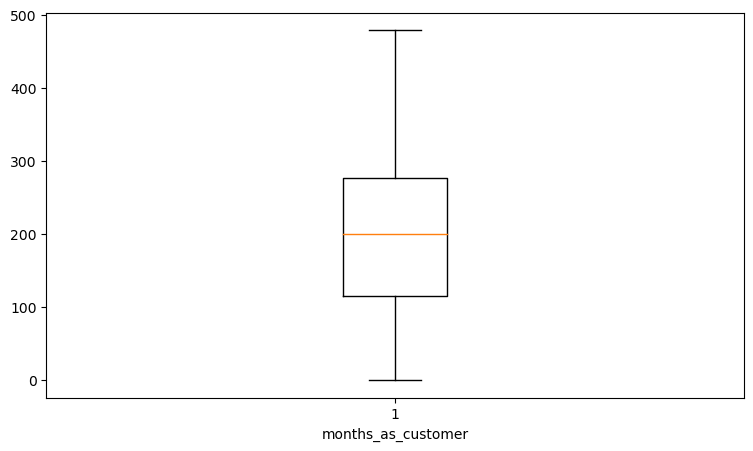

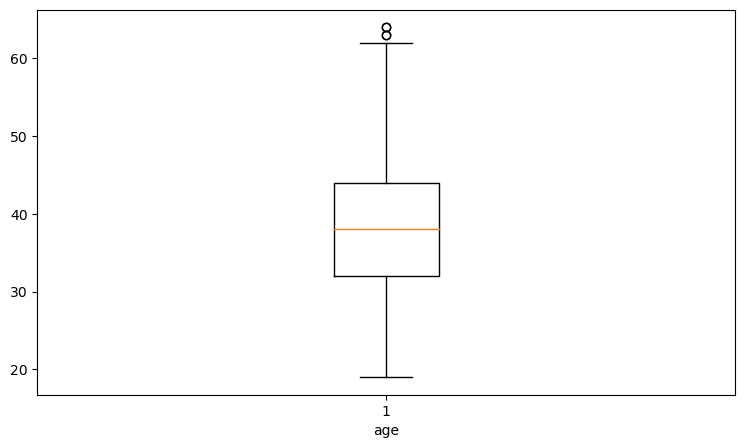

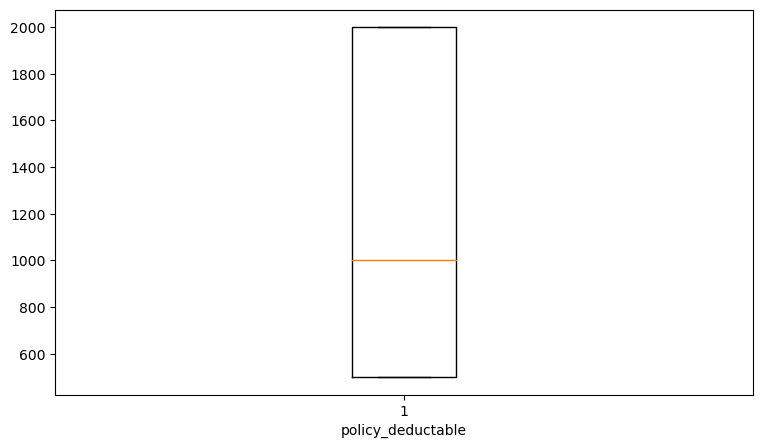

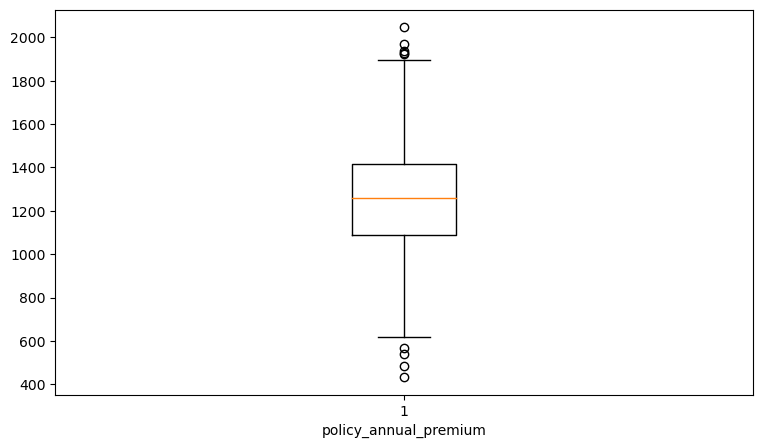

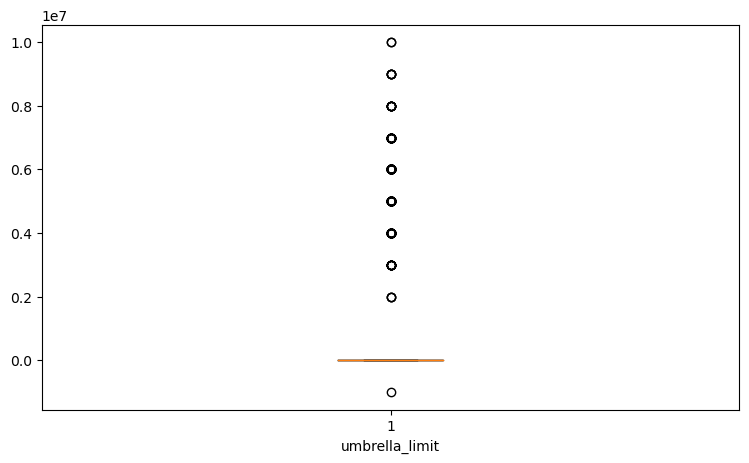

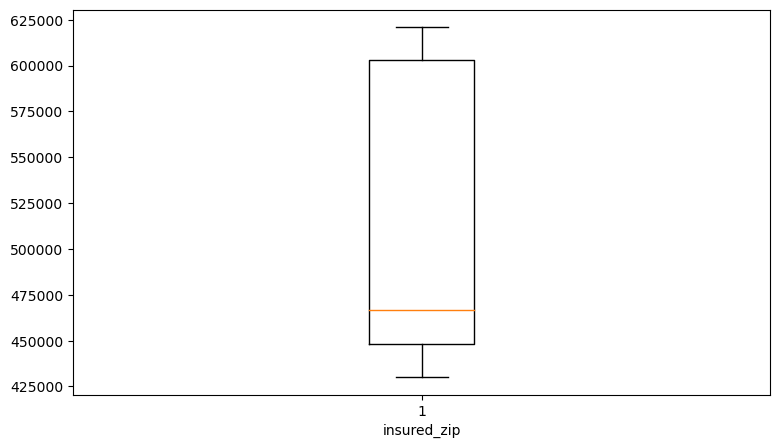

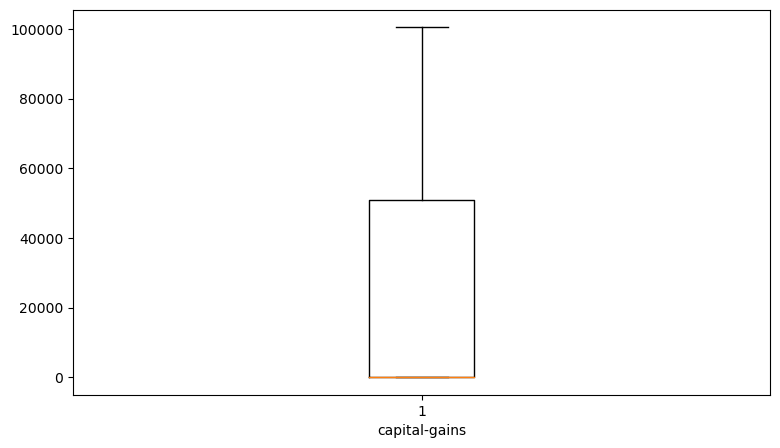

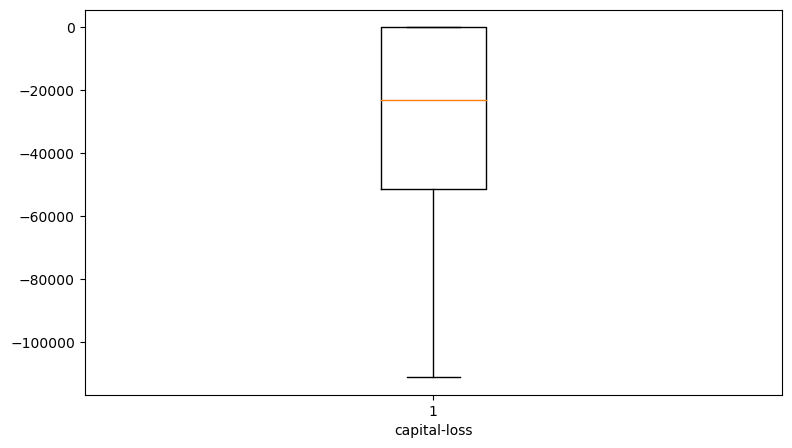

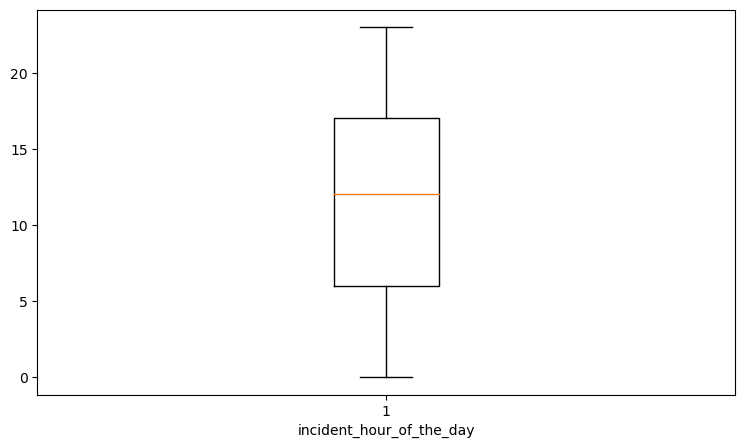

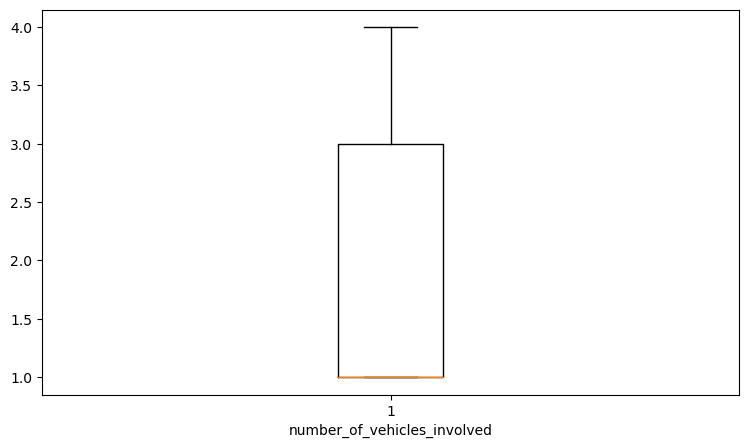

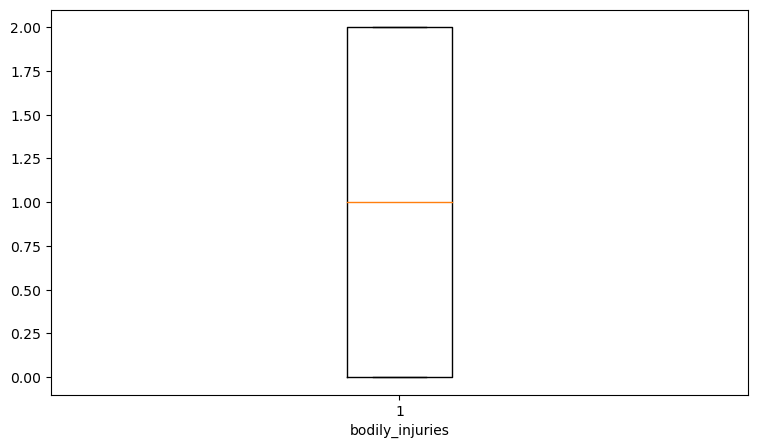

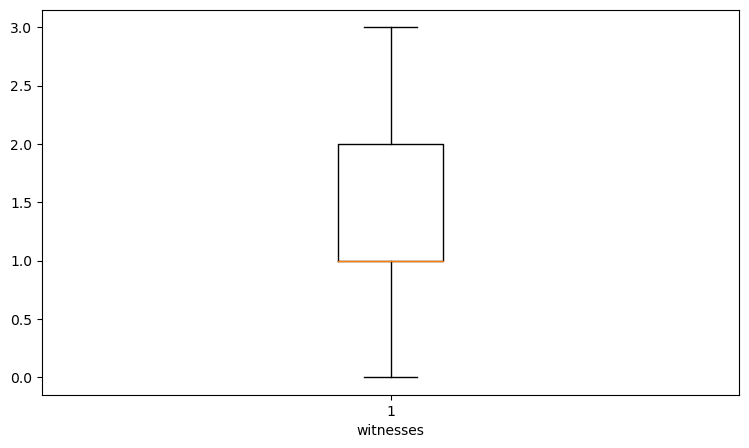

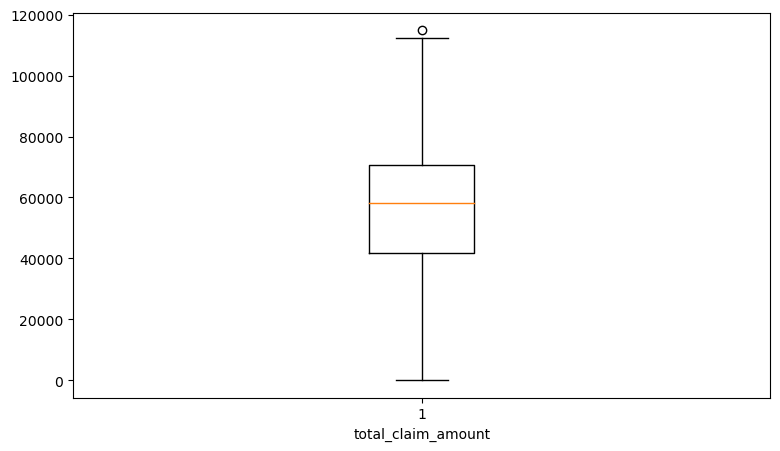

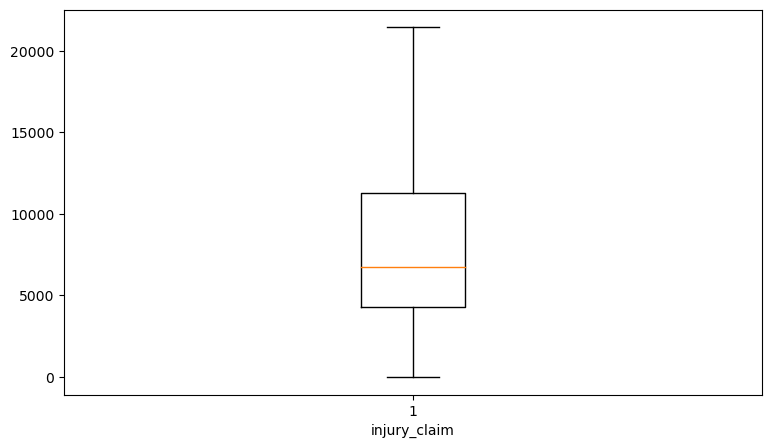

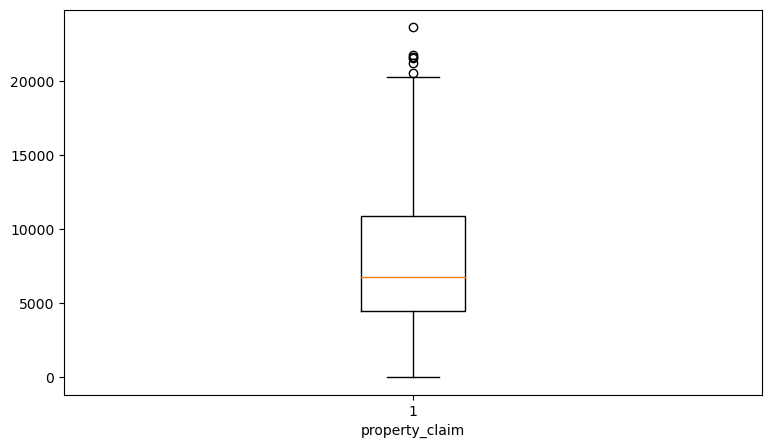

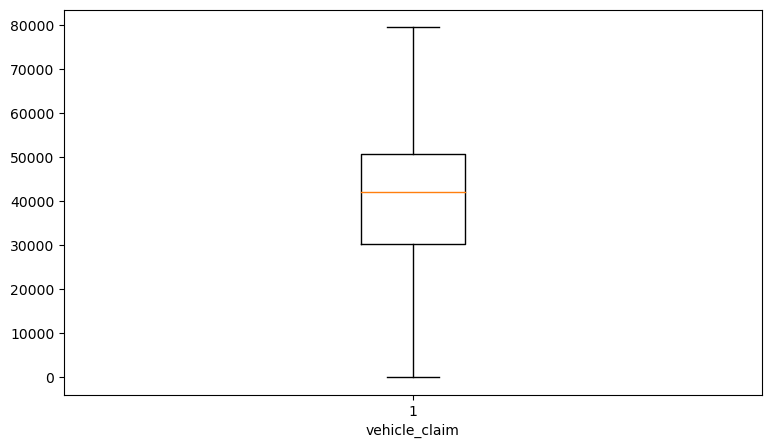

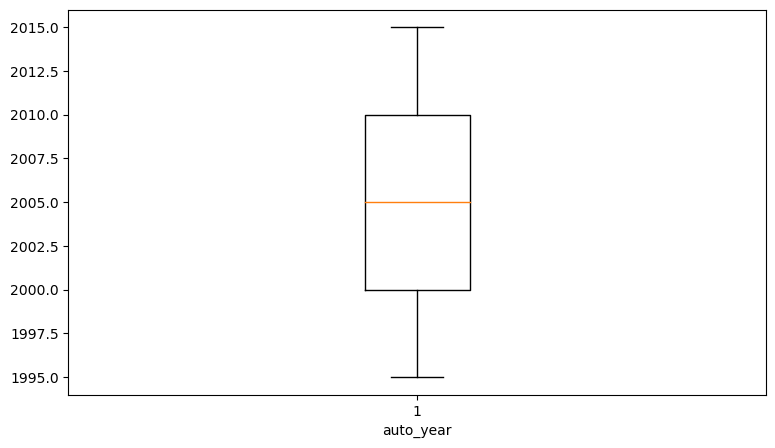

In [40]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()

age,policiy_annual_premium,total claim amount,property claim have outliers present

In [41]:
cont_data

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In [43]:
discrete = ['policy_deductable','umbrella_limit','insured_zip','number_of_vehicles_involved','bodily_injuries','witnesses']

In [44]:
continous = ['months_as_customer','age','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

# dealing with outliers

In [45]:
z = zscore(data[continous])

In [46]:
data = data[(z<3).all(axis=1)]

In [47]:
data.shape

(998, 29)

In [48]:
data_loss = (1000-998)/1000

In [49]:
data_loss

0.002

# FEATURE SELECTION

In [50]:
cat_data

['policy_state',
 'policy_csl',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'property_damage',
 'police_report_available']

In [51]:
cont_data

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [52]:
len(cat_data)

11

In [53]:
len(cont_data)

17

we have 11 categorical data and 17 continous data

In [54]:
data.corr()['fraud_reported'].sort_values()

capital-gains                 -0.019156
capital-loss                  -0.015182
policy_annual_premium         -0.013659
incident_hour_of_the_day       0.003802
auto_year                      0.007246
age                            0.011407
policy_deductable              0.014106
months_as_customer             0.019320
insured_zip                    0.019803
bodily_injuries                0.033950
number_of_vehicles_involved    0.050944
witnesses                      0.051172
umbrella_limit                 0.058104
injury_claim                   0.091981
property_claim                 0.140601
total_claim_amount             0.165251
vehicle_claim                  0.171404
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

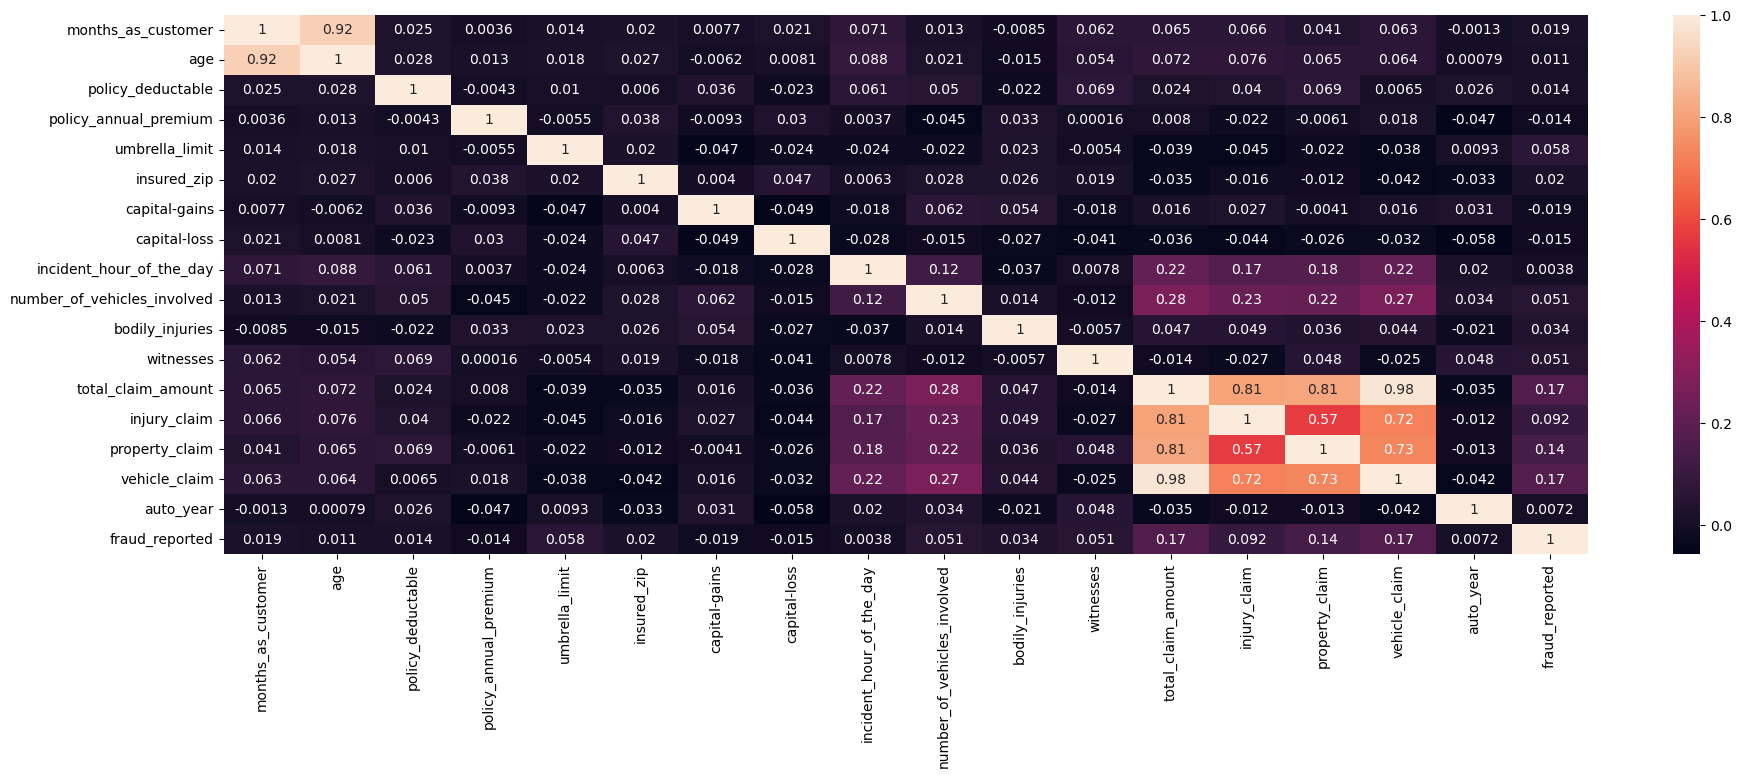

In [55]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

age,month as customer and total_claim_amount,vehicle_claim appears to be co-related

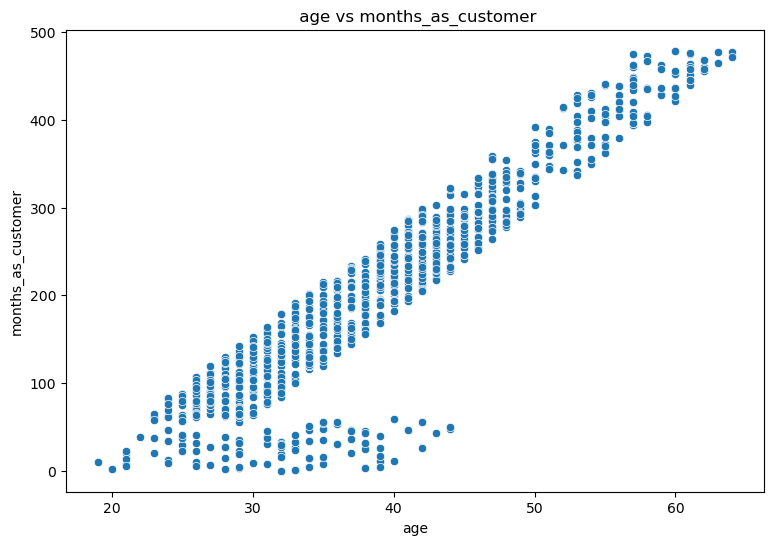

In [56]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['age'],y=data['months_as_customer'])

plt.title(' age vs months_as_customer')

plt.xlabel('age')

plt.ylabel('months_as_customer')

plt.show()

age vs months as customer shows positive linear relationship

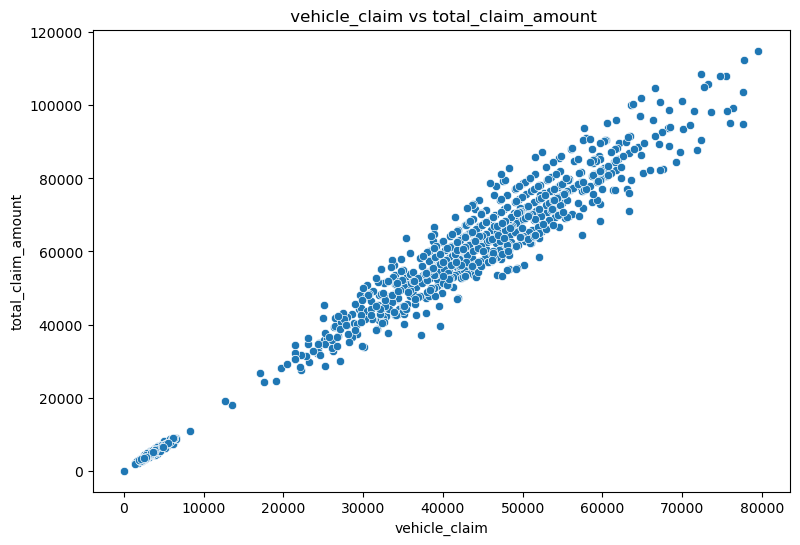

In [57]:
plt.figure(figsize=(9,6))

sns.scatterplot(x = data['vehicle_claim'],y=data['total_claim_amount'])

plt.title(' vehicle_claim vs total_claim_amount')

plt.xlabel('vehicle_claim')

plt.ylabel('total_claim_amount')

plt.show()

vehicle claim  and total claim amount also appear to have positive relationship

age and total claim amount have lesser relation with label so we can drop them

In [58]:
data.drop('total_claim_amount',axis=1,inplace=True)

In [59]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,OH,250/500,1000,1406.91,0,466132,MD,craft-repair,...,1,YES,1,2,YES,6510,13020,52080,2004,1
342868,228,42,IN,250/500,2000,1197.22,5000000,468176,MD,machine-op-inspct,...,1,?,0,0,?,780,780,3510,2007,1
687698,134,29,OH,100/300,2000,1413.14,5000000,430632,PhD,sales,...,3,NO,2,3,NO,7700,3850,23100,2007,0
227811,256,41,IL,250/500,2000,1415.74,6000000,608117,PhD,armed-forces,...,1,?,1,2,NO,6340,6340,50720,2014,1
367455,228,44,IL,500/1000,1000,1583.91,6000000,610706,Associate,sales,...,1,NO,0,1,NO,1300,650,4550,2009,0


In [60]:
cont_data.remove('total_claim_amount')

In [61]:
continous.remove('total_claim_amount')

In [62]:
len(cont_data)

16

we have total 27 features 11 categorical and 16 continous we are selecting 17 best features 11 categorical and 6 continous

In [63]:
X = data.drop(cat_data,axis=1)

X.drop('fraud_reported',axis=1,inplace=True)

In [64]:
y = data['fraud_reported']

In [65]:
mi = mutual_info_classif(X,y)

In [66]:
mi = pd.Series(mi)

mi.index = X.columns

mi.sort_values(ascending=False)

umbrella_limit                 0.030102
property_claim                 0.027832
injury_claim                   0.021256
bodily_injuries                0.015536
number_of_vehicles_involved    0.014892
witnesses                      0.014135
incident_hour_of_the_day       0.010898
policy_annual_premium          0.009721
capital-loss                   0.007069
vehicle_claim                  0.005064
months_as_customer             0.004179
age                            0.003802
policy_deductable              0.002000
auto_year                      0.001541
insured_zip                    0.000000
capital-gains                  0.000000
dtype: float64

In [67]:
bestf = SelectKBest(mutual_info_classif,k=6)

bestf.fit(X,y)

a = X.columns[bestf.get_support()]

In [68]:
a

Index(['age', 'policy_deductable', 'policy_annual_premium', 'injury_claim',
       'property_claim', 'vehicle_claim'],
      dtype='object')

In [69]:
A = list(a)

In [70]:
a = A+cat_data

In [71]:
x = data[a]

In [72]:
x.shape

(998, 17)

In [73]:
x.head()

,age,policy_deductable,policy_annual_premium,injury_claim,property_claim,vehicle_claim,policy_state,policy_csl,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available
policy_number,,,,,,,,,,,,,,,,,
521585,48,1000,1406.91,6510,13020,52080,OH,250/500,MD,craft-repair,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,YES,YES
342868,42,2000,1197.22,780,780,3510,IN,250/500,MD,machine-op-inspct,Vehicle Theft,?,Minor Damage,Police,VA,?,?
687698,29,2000,1413.14,7700,3850,23100,OH,100/300,PhD,sales,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,NO,NO
227811,41,2000,1415.74,6340,6340,50720,IL,250/500,PhD,armed-forces,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,?,NO
367455,44,1000,1583.91,1300,650,4550,IL,500/1000,Associate,sales,Vehicle Theft,?,Minor Damage,None,NY,NO,NO


In [74]:
x.skew()

age                      0.476782
policy_deductable        0.475562
policy_annual_premium   -0.020906
injury_claim             0.266995
property_claim           0.355348
vehicle_claim           -0.618319
dtype: float64

all the data is in skewed limit

# DATA SCALING

In [75]:
ss = StandardScaler()

In [76]:
x[A] = ss.fit_transform(x[A])

In [77]:
x.head()

,age,policy_deductable,policy_annual_premium,injury_claim,property_claim,vehicle_claim,policy_state,policy_csl,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available
policy_number,,,,,,,,,,,,,,,,,
521585,0.989152,-0.223550,0.621810,-0.187754,1.174392,0.751612,OH,250/500,MD,craft-repair,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,YES,YES
342868,0.332641,1.410906,-0.242289,-1.362343,-1.375843,-1.821331,IN,250/500,MD,machine-op-inspct,Vehicle Theft,?,Minor Damage,Police,VA,?,?
687698,-1.089799,1.410906,0.647482,0.056183,-0.736200,-0.783572,OH,100/300,PhD,sales,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,NO,NO
227811,0.223222,1.410906,0.658197,-0.222602,-0.217403,0.679567,IL,250/500,PhD,armed-forces,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,?,NO
367455,0.551478,-0.223550,1.351198,-1.255749,-1.402928,-1.766238,IL,500/1000,Associate,sales,Vehicle Theft,?,Minor Damage,None,NY,NO,NO


In [78]:
cat_data

['policy_state',
 'policy_csl',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'property_damage',
 'police_report_available']

In [79]:
x['policy_state'] = le.fit_transform(x['policy_state'])

In [80]:
x['policy_csl'] = le.fit_transform(x['policy_csl'])

In [81]:
x['insured_education_level'] = le.fit_transform(x['insured_education_level'])

In [82]:
x['insured_occupation'] = le.fit_transform(x['insured_occupation'])

In [83]:
x['incident_type'] = le.fit_transform(x['incident_type'])

In [84]:
x['collision_type'] = le.fit_transform(x['collision_type'])

In [85]:
x['incident_severity'] = le.fit_transform(x['incident_severity'])

In [86]:
x['authorities_contacted'] = le.fit_transform(x['authorities_contacted'])

In [87]:
x['incident_state'] = le.fit_transform(x['incident_state'])

In [88]:
x['property_damage'] = le.fit_transform(x['property_damage'])

In [89]:
x['police_report_available'] = le.fit_transform(x['police_report_available'])

In [90]:
x.head()

,age,policy_deductable,policy_annual_premium,injury_claim,property_claim,vehicle_claim,policy_state,policy_csl,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,police_report_available
policy_number,,,,,,,,,,,,,,,,,
521585,0.989152,-0.223550,0.621810,-0.187754,1.174392,0.751612,2,1,4,2,2,3,0,4,4,2,2
342868,0.332641,1.410906,-0.242289,-1.362343,-1.375843,-1.821331,1,1,4,6,3,0,1,4,5,0,0
687698,-1.089799,1.410906,0.647482,0.056183,-0.736200,-0.783572,2,0,6,11,0,2,1,4,1,1,1
227811,0.223222,1.410906,0.658197,-0.222602,-0.217403,0.679567,0,1,6,1,2,1,0,4,2,0,1
367455,0.551478,-0.223550,1.351198,-1.255749,-1.402928,-1.766238,0,2,0,11,3,0,1,2,1,1,1


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

# BALANCING DATA

In [92]:
y_train.value_counts()

0    594
1    204
Name: fraud_reported, dtype: int64

In [93]:
sm = SMOTE()

In [94]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [95]:
y_train.value_counts()

0    594
1    594
Name: fraud_reported, dtype: int64

# LR

In [96]:
lr = LogisticRegression()

In [97]:
lr.fit(x_train,y_train)

LogisticRegression()

In [98]:
pred1 = lr.predict(x_train)

In [99]:
pred2 = lr.predict(x_test)

In [100]:
print(f'Train Score: {accuracy_score(y_train,pred1)}')

Train Score: 0.8005050505050505


In [101]:
print(f'Test Score: {accuracy_score(y_test,pred2)}')

Test Score: 0.715


In [102]:
a1 = accuracy_score(y_train,pred1)

In [103]:
a2 = accuracy_score(y_test,pred2)

In [104]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       157
           1       0.40      0.63      0.49        43

    accuracy                           0.71       200
   macro avg       0.64      0.68      0.64       200
weighted avg       0.78      0.71      0.73       200



In [105]:
print(confusion_matrix(y_test,pred2))

[[116  41]
 [ 16  27]]


In [106]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.7805778894472362

# KNN

In [107]:
knn = KNeighborsClassifier()

In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
pred3 = knn.predict(x_train)

In [110]:
pred4 = knn.predict(x_test)

In [111]:
print(f'Train Score: {accuracy_score(y_train,pred3)}')

Train Score: 0.8526936026936027


In [112]:
print(f'Test Score: {accuracy_score(y_test,pred4)}')

Test Score: 0.615


In [113]:
a4 = accuracy_score(y_train,pred3)

In [114]:
a5 = accuracy_score(y_test,pred4)

In [115]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       157
           1       0.29      0.53      0.37        43

    accuracy                           0.61       200
   macro avg       0.56      0.59      0.55       200
weighted avg       0.72      0.61      0.65       200



In [116]:
print(confusion_matrix(y_test,pred4))

[[100  57]
 [ 20  23]]


In [117]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.7304422110552764

# DT

In [118]:
dt = DecisionTreeClassifier()

In [119]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
pred5 = dt.predict(x_train)

In [121]:
pred6 = dt.predict(x_test)

In [122]:
print(f'Train Score: {accuracy_score(y_train,pred5)}')

Train Score: 1.0


In [123]:
print(f'Test Score: {accuracy_score(y_test,pred6)}')

Test Score: 0.72


In [124]:
a7 = accuracy_score(y_train,pred5)

In [125]:
a8 = accuracy_score(y_test,pred6)

In [126]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       157
           1       0.38      0.47      0.42        43

    accuracy                           0.72       200
   macro avg       0.61      0.63      0.62       200
weighted avg       0.74      0.72      0.73       200



In [127]:
print(confusion_matrix(y_test,pred6))

[[124  33]
 [ 23  20]]


In [128]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7114472361809046

# RF

In [129]:
rf = RandomForestClassifier()

In [130]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [131]:
pred7 = rf.predict(x_train)

In [132]:
pred8 = rf.predict(x_test)

In [133]:
print(f'Train Score: {accuracy_score(y_train,pred7)}')

Train Score: 1.0


In [134]:
print(f'Test Score: {accuracy_score(y_test,pred8)}')

Test Score: 0.765


In [135]:
a10 = accuracy_score(y_train,pred7)

In [136]:
a11 = accuracy_score(y_test,pred8)

In [137]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       157
           1       0.46      0.51      0.48        43

    accuracy                           0.77       200
   macro avg       0.66      0.67      0.67       200
weighted avg       0.78      0.77      0.77       200



In [138]:
print(confusion_matrix(y_test,pred8))

[[131  26]
 [ 21  22]]


In [139]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.7845929648241206

# ada

In [140]:
ada = AdaBoostClassifier()

In [141]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [142]:
pred9 = ada.predict(x_train)

In [143]:
pred10 = ada.predict(x_test)

In [144]:
print(f'Train Score: {accuracy_score(y_train,pred9)}')

Train Score: 0.8577441077441077


In [145]:
print(f'Test Score: {accuracy_score(y_test,pred10)}')

Test Score: 0.74


In [146]:
a13 = accuracy_score(y_train,pred9)

In [147]:
a14 = accuracy_score(y_test,pred10)

In [148]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       157
           1       0.42      0.51      0.46        43

    accuracy                           0.74       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.76      0.74      0.75       200



In [149]:
print(confusion_matrix(y_test,pred10))

[[126  31]
 [ 21  22]]


In [150]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.7765678391959798

# GBDT

In [151]:
gb = GradientBoostingClassifier()

In [152]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [153]:
pred11 = gb.predict(x_train)

In [154]:
pred12 = gb.predict(x_test)

In [155]:
print(f'Train Score: {accuracy_score(y_train,pred11)}')

Train Score: 0.9326599326599326


In [156]:
print(f'Test Score: {accuracy_score(y_test,pred12)}')

Test Score: 0.765


In [157]:
a16 = accuracy_score(y_train,pred11)

In [158]:
a17 = accuracy_score(y_test,pred12)

In [159]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       157
           1       0.45      0.47      0.46        43

    accuracy                           0.77       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.77      0.77      0.77       200



In [160]:
print(confusion_matrix(y_test,pred12))

[[133  24]
 [ 23  20]]


In [161]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.7745879396984925

# XGBOOST

In [162]:
xg = XGBClassifier()

In [163]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [164]:
pred13 = xg.predict(x_train)

In [165]:
pred14 = xg.predict(x_test)

In [166]:
print(f'Train Score: {accuracy_score(y_train,pred13)}')

Train Score: 1.0


In [167]:
print(f'Test Score: {accuracy_score(y_test,pred14)}')

Test Score: 0.75


In [168]:
a19 = accuracy_score(y_train,pred13)

In [169]:
a20 = accuracy_score(y_test,pred14)

In [170]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       157
           1       0.43      0.47      0.44        43

    accuracy                           0.75       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.76      0.75      0.75       200



In [171]:
print(confusion_matrix(y_test,pred14))

[[130  27]
 [ 23  20]]


In [172]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7705678391959799

# SVM

In [173]:
svm = SVC()

In [174]:
svm.fit(x_train,y_train)

SVC()

In [175]:
pred15 = svm.predict(x_train)

In [176]:
pred16 = svm.predict(x_test)

In [177]:
print(f'Train Score: {accuracy_score(y_train,pred15)}')

Train Score: 0.8476430976430976


In [178]:
print(f'Test Score: {accuracy_score(y_test,pred16)}')

Test Score: 0.725


In [179]:
a22 = accuracy_score(y_train,pred15)

In [180]:
a23 = accuracy_score(y_test,pred16)

In [181]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       157
           1       0.41      0.63      0.50        43

    accuracy                           0.73       200
   macro avg       0.64      0.69      0.65       200
weighted avg       0.78      0.72      0.74       200



In [182]:
print(confusion_matrix(y_test,pred16))

[[118  39]
 [ 16  27]]


In [183]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.7525075376884421

In [184]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [185]:
train = []
test = []
cv = []

In [186]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [187]:
result = pd.DataFrame({"MODEL":model,"TRAIN":train,"TEST":test,'CV':cv})

In [188]:
result

,MODEL,TRAIN,TEST,CV
0,LR,0.800505,0.715,0.780578
1,KNN,0.852694,0.615,0.730442
2,DT,1.000000,0.720,0.711447
3,RF,1.000000,0.765,0.784593
4,ADA,0.857744,0.740,0.776568
5,GBDT,0.932660,0.765,0.774588
6,XGBOOST,1.000000,0.750,0.770568
7,SVM,0.847643,0.725,0.752508


# LR is the best model we have

# HYPER PARAMETER TUNING

In [189]:
lr = LogisticRegression()

In [192]:
para = {'penalty':['l1', 'l2', 'elasticnet'],
       'C':[0.001,0.01,0.1,1],
       'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
                 'max_iter':[100,200,300],
                 'multi_class':['auto', 'ovr', 'multinomial']}

In [193]:
gs = GridSearchCV(lr,para,n_jobs=-1)

In [194]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [195]:
gs.best_params_

{'C': 0.01,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [196]:
trainpred = gs.best_estimator_.predict(x_train)

In [197]:
testpred = gs.best_estimator_.predict(x_test)

In [198]:
print(f'Train Score: {accuracy_score(y_train,trainpred)}')

Train Score: 0.7887205387205387


In [200]:
print(f'Test Score: {accuracy_score(y_test,testpred)}')

Test Score: 0.78


In [201]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       157
           1       0.49      0.67      0.57        43

    accuracy                           0.78       200
   macro avg       0.70      0.74      0.71       200
weighted avg       0.81      0.78      0.79       200



In [202]:
print(confusion_matrix(y_test,testpred))

[[127  30]
 [ 14  29]]


In [203]:
cv = cross_val_score(gs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.7525075376884421

In [204]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

In [205]:
roc_auc_score(y_test,testpred)

0.741667901051696

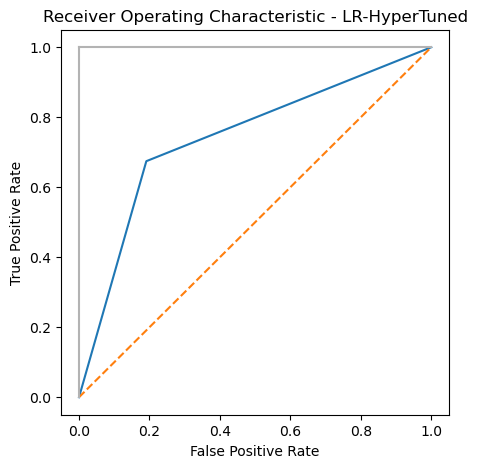

In [206]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - LR-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [208]:
conclusion = pd.DataFrame({'ACTUAL':y_test,"Predicted":testpred})

In [209]:
conclusion

,ACTUAL,Predicted
policy_number,,
356590,1,0
944537,0,0
180720,0,0
810189,0,0
630226,0,1
...,...,...
153298,0,0
682178,0,0
414779,0,0


In [212]:
pickle.dump(gs.best_estimator_,open('fraud.pkl','wb'))